# Baseline model of using the architecture found in the link below:
http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Important points of this script
- (+) --> ANNOTATED 
-  (-) --> NOT ANNOTATED
-  70% Accuracy is misleading as roughly 70% of the data has a ground truth of (+); should use other evaluation metrics like F2
-  Trained on dataset where annotations from previous pages of book that bled into current page is classified (-) 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
# ----- parameters
data_dir = "/Users/silver/Desktop/datasets/printed_with_ids"
random_seed = 10
valid_size = 0.4

# ----- data transform
transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((1, 1, 1), (1, 1, 1))])

# ----- data loading
# positive folder:1977 images
# negative folder: 842 images

# define the dataset object
train_dataset = datasets.ImageFolder(
    root=data_dir, transform=transform,
)
val_dataset = datasets.ImageFolder(
    root=data_dir, transform=transform,
)

# details
num_train = len(train_dataset)
indices = range(num_train)
split = int(np.floor(valid_size * num_train)) #1692 training, 1127 validation
np.random.seed(random_seed)
np.random.shuffle(indices)


# define training and validation idx 
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# define the loaders
num_workers = 2
pin_memory = False
batch_size =10
classes='negative', 'positive'
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, sampler=train_sampler,
    num_workers=num_workers, pin_memory=pin_memory,
)
valid_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, sampler=valid_sampler,
    num_workers=num_workers, pin_memory=pin_memory,
)

negative positive negative positive positive positive positive positive positive positive

 0
 1
 0
 1
 1
 1
 1
 1
 1
 1
[torch.LongTensor of size 10]



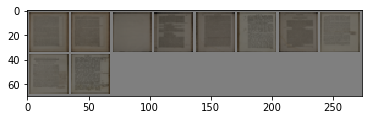

In [3]:
# ----- functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(labels)


In [4]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 10 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.068
[1,    11] loss: 0.652
[1,    21] loss: 0.632
[1,    31] loss: 0.609
[1,    41] loss: 0.629
[1,    51] loss: 0.590
[1,    61] loss: 0.622
[1,    71] loss: 0.649
[1,    81] loss: 0.585
[1,    91] loss: 0.610
[1,   101] loss: 0.621
[1,   111] loss: 0.582
[1,   121] loss: 0.687
[1,   131] loss: 0.592
[1,   141] loss: 0.594
[1,   151] loss: 0.606
[1,   161] loss: 0.637
[2,     1] loss: 0.067
[2,    11] loss: 0.664
[2,    21] loss: 0.602
[2,    31] loss: 0.585
[2,    41] loss: 0.614
[2,    51] loss: 0.629
[2,    61] loss: 0.577
[2,    71] loss: 0.640
[2,    81] loss: 0.531
[2,    91] loss: 0.652
[2,   101] loss: 0.628
[2,   111] loss: 0.640
[2,   121] loss: 0.611
[2,   131] loss: 0.576
[2,   141] loss: 0.544
[2,   151] loss: 0.619
[2,   161] loss: 0.688
Finished Training


('GroundTruth: ', 'negative positive positive positive positive positive positive positive positive positive')


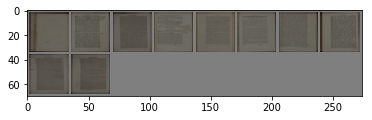

In [7]:
dataiter = iter(valid_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [8]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

('Predicted: ', 'positive positive positive positive positive positive positive positive positive positive')


In [9]:
correct = 0
total = 0
for data in valid_loader:    
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print("Correct Predictions: " + str(correct))
print("Total Predictions: " + str(total))
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Correct Predictions: 791
Total Predictions: 1127
Accuracy of the network on the test images: 70 %
